##  Load the Dataset

In [2]:
import pandas as pd

import matplotlib.pyplot as plt


C:\Users\HolarTech\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HolarTech\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
# Read the dataset
data = pd.read_excel('customer.xlsx')

In [4]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Impute missing values in the 'Description' column with the mode (most frequent value)
data['Description'] = data['Description'].fillna(data['Description'].mode()[0])

In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Drop rows with missing CustomerID values
data.dropna(subset=['CustomerID'], inplace=True)


## Identify Discount or Promotion Events

In [10]:
# Filter the dataset to identify discount transactions
discount_transactions = data[data['Description'].str.contains('Discount', case=False)]


In [11]:
# Print the discount transactions and their quantities
print("Discount Transactions:")
discount_transactions

Discount Transactions:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [12]:
rows, columns = data.shape
print('The shape of the dataset\n')
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

The shape of the dataset

Number of rows: 406829
Number of columns: 8


## Quantity Purchased During Discounts

In [13]:
# Group by discount events and calculate total quantity purchased
discount_quantity = discount_transactions.groupby('Description')['Quantity'].sum()


In [14]:
print(discount_quantity)

Description
Discount   -1194
Name: Quantity, dtype: int64


## Discount Impact on Revenue 

In [15]:
# Calculate revenue from discount transactions
discount_revenue = (discount_transactions['Quantity'] * discount_transactions['UnitPrice']).sum()

# Calculate revenue from non-discount transactions
non_discount_revenue = ((data[data['Quantity'] > 0]['Quantity'] * data[data['Quantity'] > 0]['UnitPrice'])).sum()

# Compare revenue
print("\nRevenue from Discount Transactions:", discount_revenue)
print("Revenue from Non-Discount Transactions:", non_discount_revenue)


Revenue from Discount Transactions: -5696.219999999999
Revenue from Non-Discount Transactions: 8911407.904


## Optimize Pricing Strategies to Affect Customer Buying Behaviour

In [16]:
# Offering a 10% discount for purchases of 10 or more units
bulk_discount = 0.1 # Assuming a 10% discount for bulk purchase

# calculate and Create a total price field
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# create a discounted price field
data['DiscountedPrice'] = data['TotalPrice']
data.loc[data['Quantity'] >= 10, 'DiscountedPrice'] *= (1 - bulk_discount)

# Display the updated DataFrame with discounted prices
print("\nUpdated DataFrame with Discounted Prices:")



Updated DataFrame with Discounted Prices:


In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DiscountedPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


## Number of Products' Categories

In [18]:
description = data['Description'].nunique()
print(f'Number of  different categories of the product: {description}')

Number of  different categories of the product: 3896


## Number of Each Products' Categories

In [19]:
products_categories = data['Description'].value_counts().head(10)
products_categories

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: count, dtype: int64

## Number of Country Categories

In [20]:
country_categories = data['Country'].nunique()
print(f'Number of country: {country_categories}')

Number of country: 37


In [21]:
country = data['Country'].value_counts().head(10)
country

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: count, dtype: int64

## Top Ten Country

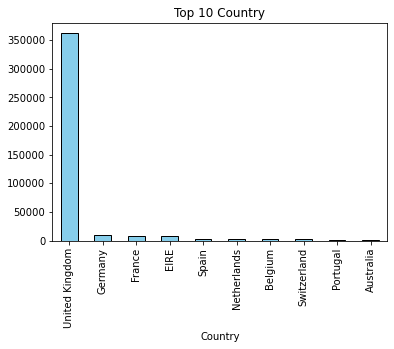

In [22]:
country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Country')
plt.show()

## Number of Customers

In [23]:
customer = data['CustomerID'].nunique()
print(f'Number of Customer: {customer}')

Number of Customer: 4372


In [24]:
customer = data['CustomerID'].value_counts().head(10)
customer

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: count, dtype: int64

## Top 10 Customers

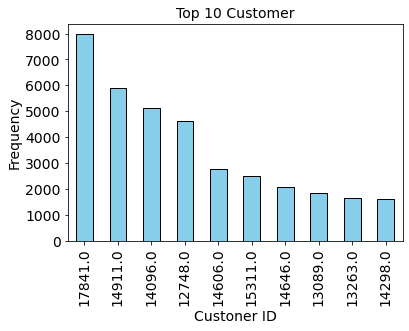

In [25]:
customer.plot(kind='bar', color='skyblue', edgecolor='black', fontsize=14)
plt.title('Top 10 Customer', fontsize=14)
plt.xlabel('Custoner ID', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Average Unit Price of each products and Total Quantity Sold of each Product as well

In [26]:
# Calculate average unit price for each product
average_unit_price = data.groupby('Description')['UnitPrice'].mean()

# Calculate total quantity sold for each product
total_quantity_sold = data.groupby('Description')['Quantity'].sum()

In [27]:
# Display the calculated metrics
print("Average Unit Price of each Product:")
# average_unit_price = pd.DataFrame(average_unit_price)
average_unit_price.sort_values(ascending=False).head(10)


Average Unit Price of each Product:


Description
DOTCOM POSTAGE                        744.147500
PICNIC BASKET WICKER 60 PIECES        649.500000
CRUK Commission                       495.839375
Manual                                334.425634
REGENCY MIRROR WITH SHUTTERS          156.428571
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    156.034483
VINTAGE RED KITCHEN CABINET           150.663043
VINTAGE BLUE KITCHEN CABINET          143.653846
CHEST NATURAL WOOD 20 DRAWERS         118.076923
LOVE SEAT ANTIQUE WHITE METAL         115.388889
Name: UnitPrice, dtype: float64

In [28]:
print("\nTotal Quantity Sold of each Product:")
# total_quantity_sold = pd.DataFrame(total_quantity_sold)
total_quantity_sold.sort_values(ascending=False).head(10)


Total Quantity Sold of each Product:


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

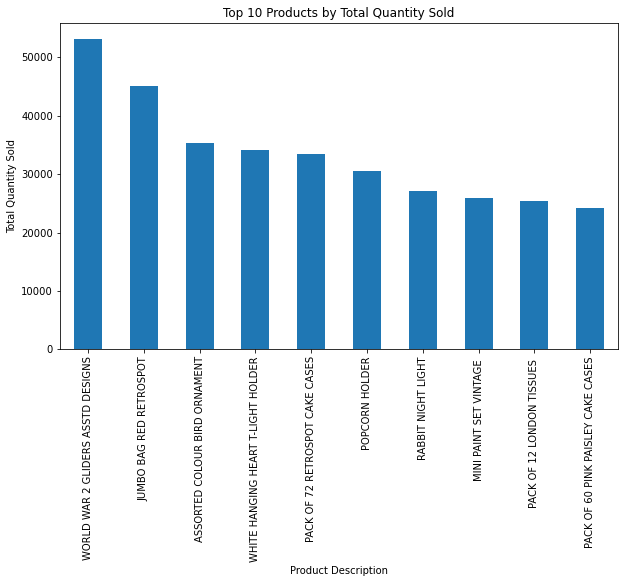

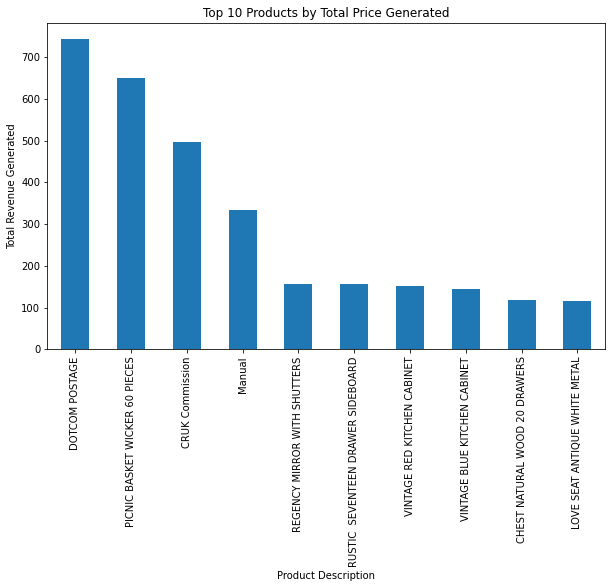

In [29]:
%matplotlib inline

# Plot total quantity sold for each product
plt.figure(figsize=(10, 6))
total_quantity_sold.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Products by Total Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

# Plot total revenue generated for each product
plt.figure(figsize=(10, 6))
average_unit_price.sort_values(ascending=False).head(10).plot(kind='bar')
# data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Products by Total Price Generated')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=90)
plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Quantifying the Impact of Discounts:

In [31]:
# Analyze the effect of discounts on sales
sales_with_discounts = data[data['DiscountedPrice'] < data['UnitPrice']]
sales_without_discounts = data[data['DiscountedPrice'] == data['UnitPrice']]

In [32]:
# Compare sales volume and revenue between discounted and non-discounted products
discounted_sales_volume = sales_with_discounts['Quantity'].sum()
non_discounted_sales_volume = sales_without_discounts['Quantity'].sum()

discounted_revenue = sales_with_discounts['TotalPrice'].sum()
non_discounted_revenue = sales_without_discounts['TotalPrice'].sum()

print("Sales Volume (Discounted):", discounted_sales_volume, 'units')
print("Sales Volume (Non-Discounted):", non_discounted_sales_volume, 'units')
print("Revenue (Discounted):" ,'$', discounted_revenue)
print("Revenue (Non-Discounted):", '$', non_discounted_revenue)

Sales Volume (Discounted): -274808 units
Sales Volume (Non-Discounted): 87185 units
Revenue (Discounted): $ -611342.0900000001
Revenue (Non-Discounted): $ 382864.7040000001


## Customer Segmentation:

**Use RFM (Recency, Frequency, Monetary) analysis for customer segmentation**

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

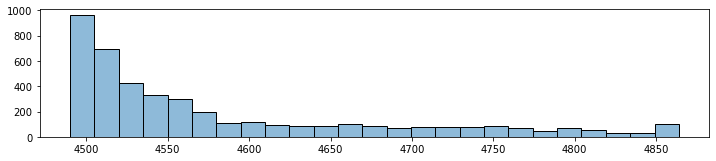

In [33]:
# Calculate RFM metrics for each customer
# Calculate Recency, Frequency, and Monetary values
today = pd.to_datetime('today')
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,  # Recency
    'Quantity': 'sum',  # Frequency (assuming each row represents a purchase)
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Quantity': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Visualize the RFM data distribution
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.histplot(rfm_data['Recency'], kde=True)
plt.title('Recency Distribution')

plt.subplot(3, 1, 2)
sns.histplot(rfm_data['Frequency'], kde=True)
plt.title('Frequency Distribution')

plt.subplot(3, 1, 3)
sns.histplot(rfm_data['Monetary'], kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()





In [34]:
# Filter the dataset to include only discount transactions
discount_transactions = data[(data['Description'] == 'Discount') & (data['Quantity'] < 0)]

# Calculate the frequency of discount transactions
discount_frequency = len(discount_transactions)

# Calculate the total amount discounted
total_discount_amount = discount_transactions['TotalPrice'].sum()

# Calculate the impact on revenue
total_revenue_impact = abs(discount_transactions['TotalPrice'].sum())

print("Frequency of discount transactions:", discount_frequency)
print("Total amount discounted:", total_discount_amount)
print("Impact on revenue (absolute value):", total_revenue_impact)

Frequency of discount transactions: 77
Total amount discounted: -5696.219999999999
Impact on revenue (absolute value): 5696.219999999999


## Calculating the RFM metrics for each customer

In [35]:
# Convert 'InvoiceDate' column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Find the most recent purchase date
most_recent_date = data['InvoiceDate'].max()

# Calculate recency for each customer
data['Recency'] = most_recent_date - data.groupby('CustomerID')['InvoiceDate'].transform('max')

# Convert recency to number of days
data['Recency'] = data['Recency'].dt.days

In [36]:
# pip uninstall seaborn matplotlib

In [37]:
# Displaying the first few rows of the dataframe to verify the results
print(data[['CustomerID', 'InvoiceDate', 'Recency']].head())

   CustomerID         InvoiceDate  Recency
0     17850.0 2010-12-01 08:26:00      301
1     17850.0 2010-12-01 08:26:00      301
2     17850.0 2010-12-01 08:26:00      301
3     17850.0 2010-12-01 08:26:00      301
4     17850.0 2010-12-01 08:26:00      301


In [38]:
# Calculate the most recent purchase date for each customer
recency = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
# print(recency)
recency.columns = ['CustomerID', 'MostRecentPurchaseDate']

# Calculate the number of days since the most recent purchase
recency['Recency'] = (data['InvoiceDate'].max() - recency['MostRecentPurchaseDate']).dt.days

# Displaying the first few rows of the Recency dataframe
print("Recency:")
print(recency.head())


Recency:
   CustomerID MostRecentPurchaseDate  Recency
0     12346.0    2011-01-18 10:17:00      325
1     12347.0    2011-12-07 15:52:00        1
2     12348.0    2011-09-25 13:13:00       74
3     12349.0    2011-11-21 09:51:00       18
4     12350.0    2011-02-02 16:01:00      309


## Calculate the Frequency and Monetary Value metrics for customer segmentation using RFM analysis.

In [39]:
# Calculate Frequency (Number of purchases) for each customer
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Calculate Monetary Value (Total amount spent) for each customer
monetary_value = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_value.columns = ['CustomerID', 'MonetaryValue']

# Displaying the first few rows of the Frequency and Monetary Value dataframes
print("Frequency:")
print(frequency.head())
print("\nMonetary Value:")
print(monetary_value.head())


Frequency:
   CustomerID  Frequency
0     12346.0          2
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1

Monetary Value:
   CustomerID  MonetaryValue
0     12346.0           0.00
1     12347.0        4310.00
2     12348.0        1797.24
3     12349.0        1757.55
4     12350.0         334.40


In [40]:
# Merge Frequency, Monetary, and Recency dataframes
rfm_table = pd.merge(recency[['CustomerID', 'Recency']], frequency[['CustomerID', 'Frequency']], on='CustomerID')
rfm_table = pd.merge(rfm_table, monetary_value[['CustomerID', 'MonetaryValue']], on='CustomerID')

# Displaying the first few rows of the RFM table
print("RFM Table:")
print(rfm_table.head())


RFM Table:
   CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      325          2           0.00
1     12347.0        1          7        4310.00
2     12348.0       74          4        1797.24
3     12349.0       18          1        1757.55
4     12350.0      309          1         334.40


In [41]:
# Define function to segment customers based on RFM values
def segment_customers(row):
    if row['Recency'] <= recency_threshold and row['Frequency'] >= frequency_threshold and row['MonetaryValue'] >= monetary_threshold:
        return 'High Value'
    elif row['Recency'] <= recency_threshold and row['Frequency'] >= frequency_threshold:
        return 'Mid Value'
    else:
        return 'Low Value'

# Set thresholds for segmentation
recency_threshold = 90  # Customers who made a purchase within the last 90 days are considered "recent"
frequency_threshold = 3  # Customers who made at least 3 purchases are considered "frequent"
monetary_threshold = 1000  # Customers who spent at least $1000 are considered "high spenders"

# Apply segmentation function to each row in the RFM table
rfm_table['Segment'] = rfm_table.apply(segment_customers, axis=1)

# Displaying the segmented RFM table
print("Segmented RFM Table:")
print(rfm_table.head())


Segmented RFM Table:
   CustomerID  Recency  Frequency  MonetaryValue     Segment
0     12346.0      325          2           0.00   Low Value
1     12347.0        1          7        4310.00  High Value
2     12348.0       74          4        1797.24  High Value
3     12349.0       18          1        1757.55   Low Value
4     12350.0      309          1         334.40   Low Value


In [ ]:
# import smtplib
# from email.mime.multipart import MIMEMultipart
# from email.mime.text import MIMEText

# # Define your email service credentials
# EMAIL_HOST = 'smtp.example.com'
# EMAIL_PORT = 587
# EMAIL_USERNAME = 'your_email@example.com'
# EMAIL_PASSWORD = 'your_email_password'

# # Function to send email
# def send_email(recipients, subject, body):
#     try:
#         # Set up the SMTP server
#         server = smtplib.SMTP(host=EMAIL_HOST, port=EMAIL_PORT)
#         server.starttls()
#         server.login(EMAIL_USERNAME, EMAIL_PASSWORD)

#         # Create message
#         message = MIMEMultipart()
#         message['From'] = EMAIL_USERNAME
#         message['To'] = ', '.join(recipients)
#         message['Subject'] = subject

#         # Add body to message
#         message.attach(MIMEText(body, 'plain'))

#         # Send email
#         server.sendmail(EMAIL_USERNAME, recipients, message.as_string())
#         print("Email sent successfully!")

#     except Exception as e:
#         print(f"Failed to send email: {str(e)}")
#     finally:
#         # Close SMTP connection
#         server.quit()

# # Define marketing content for each RFM segment
# segment_marketing_content = {
#     'High Value': 'Exclusive offers and VIP discounts for our most loyal customers!',
#     'Mid Value': 'Discover new products and promotions tailored just for you!',
#     'Low Value': 'Welcome back! Here are some special offers to thank you for shopping with us.'
# }

# # Segment customers and send targeted email campaigns
# for segment, content in segment_marketing_content.items():
#     # Select customers belonging to the current segment
#     segment_customers = rfm_table[rfm_table['Segment'] == segment]
    
#     # Craft personalized email content
#     email_subject = f"🎉 {segment} Customer Exclusive Offer Inside! 🎁"
#     email_body = f"Hi there,\n\n{content}\n\nShop now and enjoy your special offer!\n\nBest regards,\nThe Marketing Team"
    
#     # Send email campaign to segment_customers
#     email_service.send_email(segment_customers['Email'], email_subject, email_body)


In [44]:
# Perform one-hot encoding on the 'Country' column
data_dummy = pd.get_dummies(data, columns=['Country'], prefix='Country')

In [45]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'DiscountedPrice',
       'Recency'],
      dtype='object')

In [46]:
# # Generate optimal prices (target variable)

# # Step 2: Feature Engineering (No additional feature engineering needed for now)

# # Step 3: Training Data Creation
# X = data[['Quantity', 'Country_Australia', 'Country_Austria', 'Country_Bahrain',
#        'Country_Belgium', 'Country_Brazil', 'Country_Canada',
#        'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic',
#        'Country_Denmark', 'Country_EIRE', 'Country_European Community',
#        'Country_Finland', 'Country_France', 'Country_Germany',
#        'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy',
#        'Country_Japan', 'Country_Lebanon', 'Country_Lithuania',
#        'Country_Malta', 'Country_Netherlands', 'Country_Norway',
#        'Country_Poland', 'Country_Portugal', 'Country_RSA',
#        'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain',
#        'Country_Sweden', 'Country_Switzerland', 'Country_USA',
#        'Country_United Arab Emirates', 'Country_United Kingdom',]]
# y = data['OptimalPrice']

# # Step 4: Model Training
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Step 5: Model Evaluation
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

## Checking outliers in total price and quantity

In [47]:
# Checking outliers in total price and quantity
total_price_zscore = (data['TotalPrice'] - data['TotalPrice'].mean()) / data['TotalPrice'].std()
quantity_zscore = (data['Quantity'] - data['Quantity'].mean()) / data['Quantity'].std()

# Defined a threshold for identifying outliers
# You can adjust this threshold based on your specific requirements
zscore_threshold = 3

# Find outliers based on the z-score
total_price_outliers = data[total_price_zscore.abs() > zscore_threshold]
quantity_outliers = data[quantity_zscore.abs() > zscore_threshold]

# Display the outliers
print("Total Price Outliers:")




Total Price Outliers:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DiscountedPrice,Recency
870,536477,21137,BLACK RECORD COVER FRAME,480,2010-12-01 12:27:00,3.39,16210.0,United Kingdom,1627.2,1464.48,1
4505,536785,22423,REGENCY CAKESTAND 3 TIER,144,2010-12-02 15:22:00,10.95,15061.0,United Kingdom,1576.8,1419.12,3
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,1484.0,1335.60,371
6607,536970,22423,REGENCY CAKESTAND 3 TIER,120,2010-12-03 13:12:00,10.95,17949.0,United Kingdom,1314.0,1182.60,0
10205,537235,22622,BOX OF VINTAGE ALPHABET BLOCKS,156,2010-12-06 09:45:00,8.50,17381.0,United Kingdom,1326.0,1193.40,8
...,...,...,...,...,...,...,...,...,...,...,...
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom,3254.4,2928.96,1
540061,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom,2896.7,2607.03,0
540063,581457,23553,LANDMARK FRAME CAMDEN TOWN,120,2011-12-08 18:43:00,10.95,18102.0,United Kingdom,1314.0,1182.60,0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,151622.64,0


### Total Price Outliers

In [49]:
total_price_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DiscountedPrice,Recency
870,536477,21137,BLACK RECORD COVER FRAME,480,2010-12-01 12:27:00,3.39,16210.0,United Kingdom,1627.2,1464.48,1
4505,536785,22423,REGENCY CAKESTAND 3 TIER,144,2010-12-02 15:22:00,10.95,15061.0,United Kingdom,1576.8,1419.12,3
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,1484.0,1335.60,371
6607,536970,22423,REGENCY CAKESTAND 3 TIER,120,2010-12-03 13:12:00,10.95,17949.0,United Kingdom,1314.0,1182.60,0
10205,537235,22622,BOX OF VINTAGE ALPHABET BLOCKS,156,2010-12-06 09:45:00,8.50,17381.0,United Kingdom,1326.0,1193.40,8
...,...,...,...,...,...,...,...,...,...,...,...
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom,3254.4,2928.96,1
540061,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom,2896.7,2607.03,0
540063,581457,23553,LANDMARK FRAME CAMDEN TOWN,120,2011-12-08 18:43:00,10.95,18102.0,United Kingdom,1314.0,1182.60,0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,151622.64,0


### Quantity Outliers

In [51]:
# print("\nQuantity Outliers:")
quantity_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DiscountedPrice,Recency
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8,-280.80,10
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,1003.2,902.88,66
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.4,466.56,371
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,1484.0,1335.60,371
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE,230.4,207.36,9
...,...,...,...,...,...,...,...,...,...,...,...
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom,3254.4,2928.96,1
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom,1080.0,972.00,0
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom,864.0,777.60,0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,151622.64,0


Outliers can be caused by various factors, including:

1. Data entry errors: Sometimes, outliers occur due to mistakes in data entry, such as typos or incorrect measurements.

2. Natural variation: In some cases, outliers are a result of natural variation in the data. For example, extreme weather conditions might lead to unusually high or low sales for certain products.

3. Measurement errors: Outliers can occur due to errors in measurement instruments or processes. For instance, a malfunctioning scale in a warehouse might lead to incorrect quantity measurements.

4. Rare events: Outliers may represent rare or unusual events that are not reflective of typical behavior. For example, a large one-time order from a new customer or a return of a defective product can result in outliers.

5. Skewed distribution: In datasets with skewed distributions, outliers may occur naturally at the tails of the distribution. These outliers may not necessarily indicate errors but rather extreme values within the dataset.


## Analyze the month-over-month or year-over-year growth rate in revenue for each product category and compare it to overall revenue growth

## Calculate the total revenue for each product category for each month or year.

Extract the month or year from the 'InvoiceDate' column.
Group the data by the extracted month or year and the product category.
Calculate the total revenue for each group.

In [52]:
"""
This code will give us a DataFrame revenue_by_category_month containing the total revenue for each product category 
for each month. We grouped the data by year, month, and product category, then calculated the sum of the 
'TotalPrice' column for each group. Finally, we reset the index to make the DataFrame more readable.
"""
# Extract year and month from 'InvoiceDate' column
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

# Calculate total revenue for each product category for each month
revenue_by_category_month = data.groupby(['Year', 'Month', 'Description'])['TotalPrice'].sum().reset_index()

# Display the first few rows of the result
print(revenue_by_category_month.head())

   Year  Month                       Description  TotalPrice
0  2010     12     4 PURPLE FLOCK DINNER CANDLES       35.70
1  2010     12        OVAL WALL MIRROR DIAMANTE        89.55
2  2010     12   SET 2 TEA TOWELS I LOVE LONDON       755.20
3  2010     12            10 COLOUR SPACEBOY PEN      455.60
4  2010     12        12 COLOURED PARTY BALLOONS       31.20


## Calculate the growth rate of revenue for each product category compared to the previous month or year

Calculate the total revenue for each month or year.
Calculate the month-over-month or year-over-year growth rate in revenue. done
Calculate the total revenue for each product category for each month or year.
Calculate the month-over-month or year-over-year growth rate in revenue for each product category.
Compare the overall revenue growth rate with the revenue growth rate for each product category.

In [64]:
# Extract year and month from 'InvoiceDate' column
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['Year'] = data['InvoiceDate'].dt.to_period('Y')

# Calculate total revenue for each month
# monthly_revenue = data.groupby('Month')['TotalPrice'].sum()
monthly_revenue = data.groupby([data['Month']])['TotalPrice'].sum()
# Calculate total revenue for each yearly
yearly_revenue = data.groupby([data['Year']])['TotalPrice'].sum()

# Calculate month-over-month growth rate in revenue
monthly_growth_rate = monthly_revenue.pct_change()
yearly_growth_rate = yearly_revenue.pct_change()

monthly_revenu_growth_rate = pd.merge(monthly_revenue, monthly_growth_rate, on='Month')
monthly_revenu_growth_rate.columns = ['Revenue', 'GrowthRate']
print(monthly_revenu_growth_rate)

             Revenue  GrowthRate
Month                           
2010-12   554604.020         NaN
2011-01   475074.380   -0.143399
2011-02   436546.150   -0.081099
2011-03   579964.610    0.328530
2011-04   426047.851   -0.265390
2011-05   648251.080    0.521545
2011-06   608013.160   -0.062072
2011-07   574238.481   -0.055549
2011-08   616368.000    0.073366
2011-09   931440.372    0.511176
2011-10   974603.590    0.046340
2011-11  1132407.740    0.161916
2011-12   342506.380   -0.697541


### Plot month-over-month growth rate

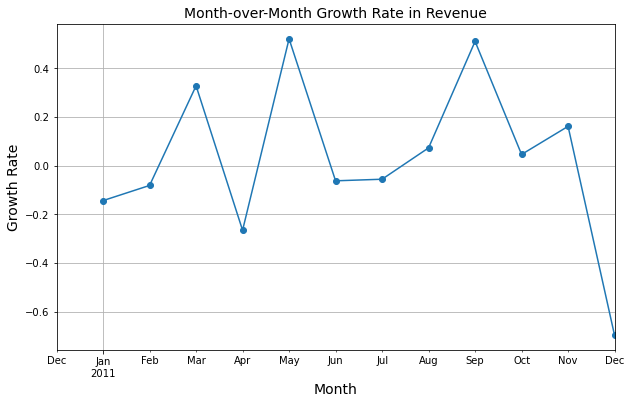

In [66]:
# Plot month-over-month growth rate
plt.figure(figsize=(10, 6))
monthly_growth_rate.plot(marker='o')
plt.title('Month-over-Month Growth Rate in Revenue', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Growth Rate', fontsize=14)
plt.grid(True)
plt.show()

### Plotting year-over-year growth rate

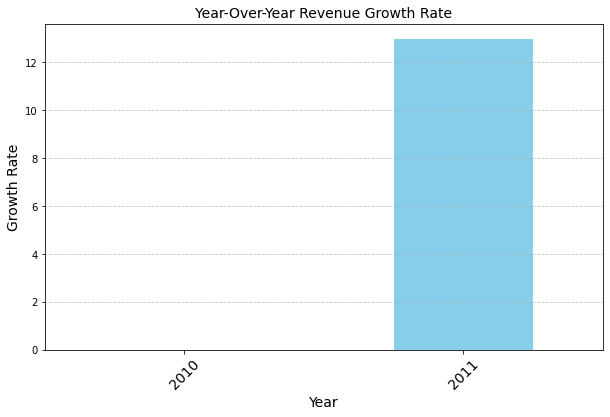

In [67]:
# Plot the overall growth rate using a bar chart
plt.figure(figsize=(10, 6))
yearly_growth_rate.plot(kind='bar', color='skyblue')
plt.title('Year-Over-Year Revenue Growth Rate', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
import sympy as sp

# Extract revenue for the current year and the previous year
revenue_current_year = yearly_revenue[1]
revenue_previous_year = yearly_revenue[0]

# Define the symbols
revenue_current_year_sym = sp.Symbol('revenue_current_year')
revenue_previous_year_sym = sp.Symbol('revenue_previous_year')

# Calculate the growth rate using sympy
yearly_growth_rate_formula = ((revenue_current_year_sym - revenue_previous_year_sym) / revenue_previous_year_sym) 

# Substitute the values into the formula
yearly_growth_rate = yearly_growth_rate_formula.subs({revenue_current_year_sym: revenue_current_year, \
                                                      revenue_previous_year_sym: revenue_previous_year})

# Print the result
print("Yearly Growth Rate:", round(yearly_growth_rate, 2), '%')


Yearly Growth Rate: 12.97 %


C:\Users\HOLART~1\AppData\Local\Temp/ipykernel_5708/2922309834.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  revenue_current_year = yearly_revenue[1]
C:\Users\HOLART~1\AppData\Local\Temp/ipykernel_5708/2922309834.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  revenue_previous_year = yearly_revenue[0]


## Calculate the total revenue for each product category for each month or year,  following these steps:

Group the data by product category and either month or year.

Sum up the TotalPrice column within each group.

To calculate the month-over-month or year-over-year growth rate in revenue for each product category, you can use the pct_change() method in pandas.

In [69]:
# Group by product category and year
revenue_by_category_year = data.groupby(['Description', data['Year']])['TotalPrice'].sum()

# Group by product category and month
revenue_by_category_month = data.groupby(['Description', data['Month']])['TotalPrice'].sum()

In [70]:
revenue_by_category_year

Description                       Year
 4 PURPLE FLOCK DINNER CANDLES    2010      35.70
                                  2011     235.06
 50'S CHRISTMAS GIFT BAG LARGE    2011    2269.75
 DOLLY GIRL BEAKER                2011    2750.75
 I LOVE LONDON MINI BACKPACK      2011    1454.00
                                           ...   
ZINC TOP  2 DOOR WOODEN SHELF     2011     152.55
ZINC WILLIE WINKIE  CANDLE STICK  2010     147.90
                                  2011    2018.85
ZINC WIRE KITCHEN ORGANISER       2011     156.80
ZINC WIRE SWEETHEART LETTER TRAY  2011     253.24
Name: TotalPrice, Length: 6229, dtype: float64

In [71]:
revenue_by_category_month

Description                       Month  
 4 PURPLE FLOCK DINNER CANDLES    2010-12    35.70
                                  2011-01     5.10
                                  2011-02     2.55
                                  2011-04    20.40
                                  2011-05     7.65
                                             ...  
ZINC WIRE SWEETHEART LETTER TRAY  2011-08     3.75
                                  2011-09     7.50
                                  2011-10    30.00
                                  2011-11    33.75
                                  2011-12    16.25
Name: TotalPrice, Length: 30864, dtype: float64

In [67]:
import matplotlib.pyplot as plt

# Group the data by year and sum up the total revenue
yearly_revenue = data.groupby(data['Year'])['TotalPrice'].sum()

# Calculate the year-over-year percentage change in revenue
overall_growth_rate = revenue_by_category_year.pct_change()

# Plot the overall growth rate using a bar chart
plt.figure(figsize=(10, 6))
overall_growth_rate.plot(kind='bar', color='skyblue')
plt.title('Year-Over-Year Revenue Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


KeyboardInterrupt: 

## Analyzing customer orders by country and creating a geographical heat map to visualize the distribution of customer orders. Here's how you can do it:

Group the data by country and count the number of orders in each country.
Create a geographical heat map using a library like Geopandas or Plotly to visualize the distribution of customer orders.

In [63]:
# Group the data by country and count the number of orders in each country
orders_by_country = data2.groupby('Country')['InvoiceNo'].count().reset_index()

NameError: name 'data2' is not defined

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import geopandas as gpd

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the orders by country data
world = world.merge(orders_by_country, how='left', left_on='name', right_on='Country')

# Plot the geographical heat map
world.plot(column='InvoiceNo', cmap='OrRd', legend=True, figsize=(15, 10))
plt.title('Distribution of Customer Orders by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame containing the data grouped by country
# and the count of orders in each country

# Create the choropleth map
fig = px.choropleth(data2, 
                    locations='Country', 
                    locationmode='country names',
                    color='OrderCount',
                    color_continuous_scale='Viridis',
                    hover_name='Country',
                    title='Distribution of Customer Orders by Country')

# Show the map
fig.show()


In [ ]:
import matplotlib.pyplot as plt

# Create subplots for histograms and box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histograms for Quantity and UnitPrice
data2['Quantity'].plot(kind='hist', bins=20, ax=axes[0, 0], title='Quantity Histogram')
data2['UnitPrice'].plot(kind='hist', bins=20, ax=axes[0, 1], title='UnitPrice Histogram')

# Plot box plots for Quantity and UnitPrice
data2.boxplot(column='Quantity', ax=axes[1, 0])
data2.boxplot(column='UnitPrice', ax=axes[1, 1])

plt.tight_layout()
plt.show()


In [ ]:
# Select only numerical columns for outlier detection
numerical_columns = data2.select_dtypes(include=['int', 'float']).columns

# Calculate the IQR for each numerical column
Q1 = data2[numerical_columns].quantile(0.25)
Q3 = data2[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each numerical column
outliers = {}
for column in numerical_columns:
    outliers[column] = data2[(data2[column] < lower_bound[column]) | (data2[column] > upper_bound[column])]

# Print the outliers for each numerical column
for column, outlier_data in outliers.items():
    print(f"Outliers for {column}:")
    print(outlier_data)
    print()


In [ ]:
# Assuming you're interested in outliers in terms of total price and quantity
# total_price_zscore = (data2['TotalPrice'] - data['TotalPrice'].mean()) / data2['TotalPrice'].std()
quantity_zscore = (data2['Quantity'] - data2['Quantity'].mean()) / data2['Quantity'].std()

# Define a threshold for identifying outliers
# You can adjust this threshold based on your specific requirements
zscore_threshold = 3

# Find outliers based on the z-score
# total_price_outliers = data2[total_price_zscore.abs() > zscore_threshold]
quantity_outliers = data2[quantity_zscore.abs() > zscore_threshold]

# Display the outliers
print("Total Price Outliers:")
(quantity_outliers)

In [ ]:
import plotly.express as px

# Group the data by country and calculate total sales activity
sales_by_country = data.groupby('Country')['Quantity'].sum().reset_index()

# Create a geographical heat map
fig = px.choropleth(sales_by_country, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Quantity', 
                    color_continuous_scale='Viridis', 
                    title='Distribution of Customer Orders by Country')

# Add country names as text annotations
for index, row in sales_by_country.iterrows():
    fig.add_annotation(
        x=row['Country'],
        y=row['Quantity'],
        text=row['Country'],
        showarrow=False,
        font=dict(size=10, color='black'),
    )
    
fig.show()
